### train and vocal extraction with simple CNN

In [1]:
import os
import pandas as pd

Data_path = os.path.pardir
Data_path += "/Data/kaggle_data/common-voice/"

data_frame = pd.read_csv(Data_path + "cv-valid-train.csv")

data_frame.head()

filename  \
0  cv-valid-train/sample-000000.mp3   
1  cv-valid-train/sample-000001.mp3   
2  cv-valid-train/sample-000002.mp3   
3  cv-valid-train/sample-000003.mp3   
4  cv-valid-train/sample-000004.mp3   

                                                text  up_votes  down_votes  \
0  learn to recognize omens and follow them the o...         1           0   
1         everything in the universe evolved he said         1           0   
2  you came so that you could learn about your dr...         1           0   
3  so now i fear nothing because it was those ome...         1           0   
4  if you start your emails with greetings let me...         3           2   

   age gender accent  duration  
0  NaN    NaN    NaN       NaN  
1  NaN    NaN    NaN       NaN  
2  NaN    NaN    NaN       NaN  
3  NaN    NaN    NaN       NaN  
4  NaN    NaN    NaN       NaN

In [2]:
import librosa
from IPython.display import Audio

test_data_path = Data_path + "cv-valid-train/cv-valid-train/sample-000006.mp3"

voice_source, sample_rate = librosa.load(test_data_path, mono=True)

print("Length : {}".format(len(voice_source)))
print("Sample rate : {}".format(sample_rate))
print("L / R : {:.2f} sec".format(len(voice_source) / sample_rate))
Audio(voice_source, rate=sample_rate)

Length : 172520
Sample rate : 22050
L / R : 7.82 sec


In [3]:
music_data_path = "../Data/sample/Jonas Blue - Fast Car ft. Dakota (Official Video).mp3"

print(sample_rate)
music_source, sample_rate = librosa.load(music_data_path, mono=True, duration=(len(voice_source) / sample_rate))

print("Length : {}".format(len(music_source)))
print("Sample rate : {}".format(sample_rate))
print("L / R : {:.2f} sec".format(len(music_source) / sample_rate))

Audio(music_source, rate=sample_rate)

22050
Length : 172520
Sample rate : 22050
L / R : 7.82 sec


In [4]:
print(voice_source.shape, music_source.shape)

merge_source = voice_source + music_source

Audio(merge_source, rate=sample_rate)

(172520,) (172520,)


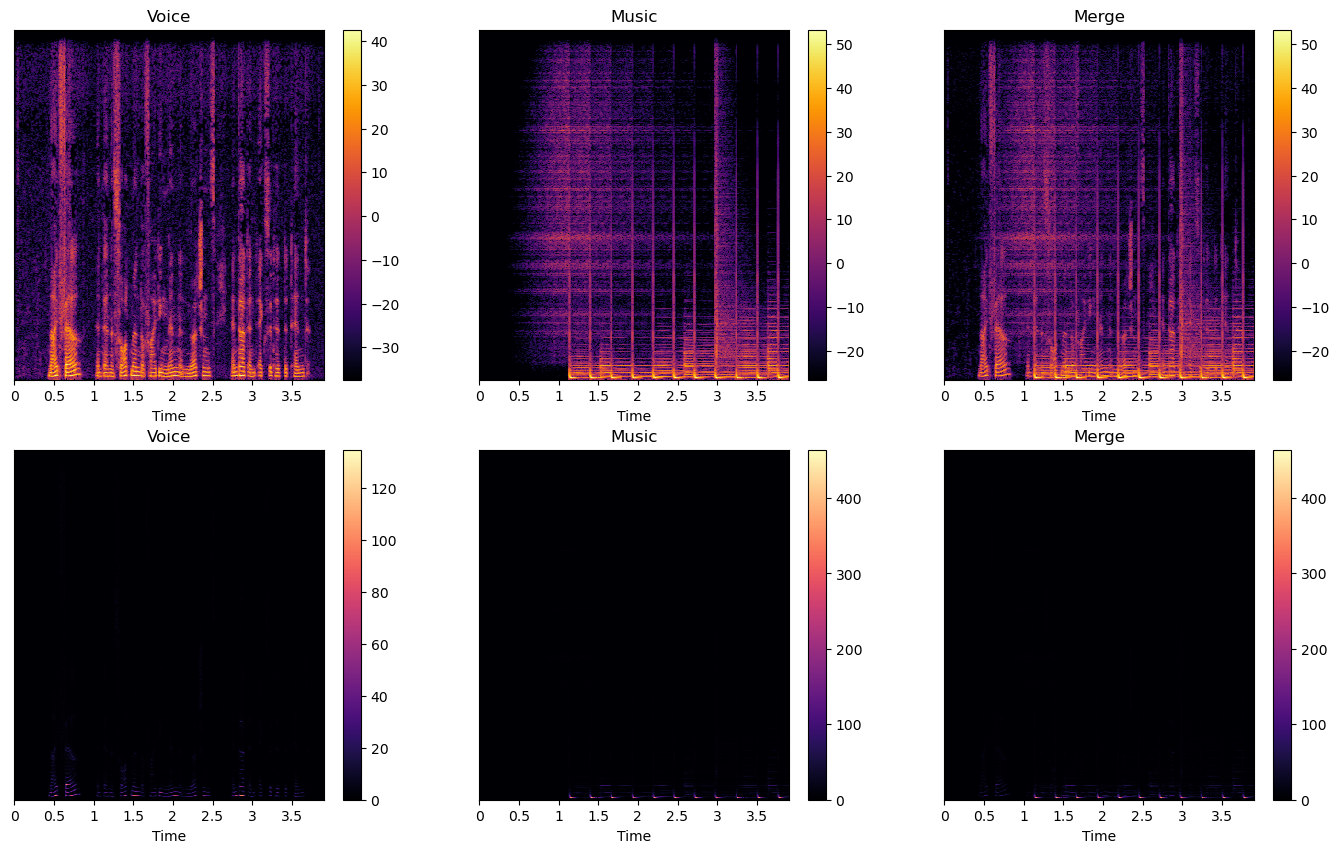

In [5]:
import numpy as np
import matplotlib.pyplot as plt

D_voice_raw = librosa.stft(voice_source) 
D_voice = np.abs(D_voice_raw)

D_music_raw = librosa.stft(music_source)
D_music = np.abs(D_music_raw)

D_merge_raw = librosa.stft(merge_source)
D_merge = np.abs(D_merge_raw)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,10))

for ax, D, title in zip(axes[0], [D_voice, D_music, D_merge], ["Voice", "Music", "Merge"]) : 
    S_db = librosa.amplitude_to_db(D)
    cb = librosa.display.specshow(S_db, x_axis="time", sr=sample_rate * 2, ax=ax, cmap="inferno")
    ax.set_title(title)
    plt.colorbar(cb)

for ax, D, title in zip(axes[1], [D_voice, D_music, D_merge], ["Voice", "Music", "Merge"]) : 
    cb = librosa.display.specshow(D, x_axis="time", sr=sample_rate * 2, ax=ax)
    ax.set_title(title)
    plt.colorbar(cb)



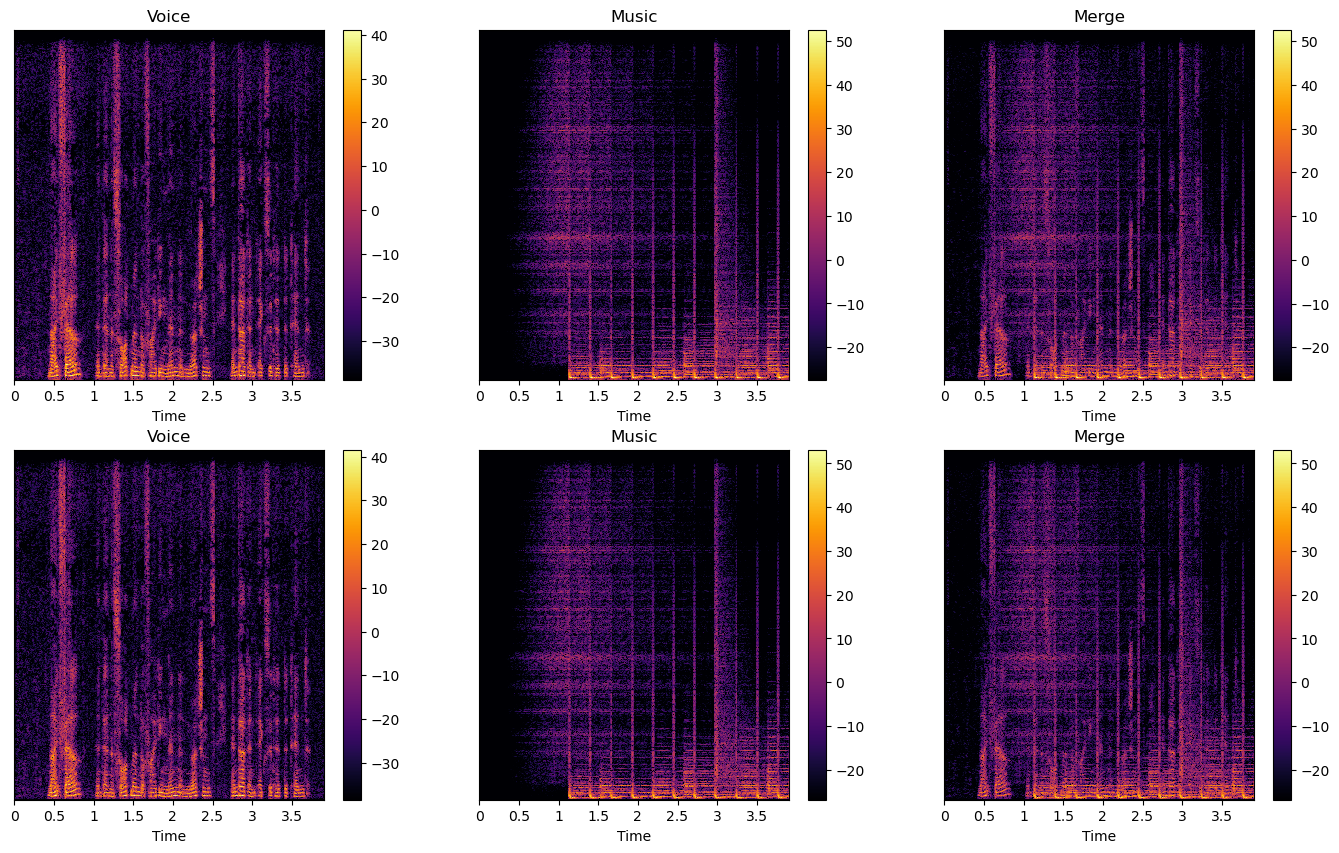

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,10))

for ax, D, title in zip(axes[0], [D_voice_raw.real, D_music_raw.real, D_merge_raw.real], ["Voice", "Music", "Merge"]) : 
    S_db = librosa.amplitude_to_db(D)
    cb = librosa.display.specshow(S_db, x_axis="time", sr=sample_rate * 2, ax=ax, cmap="inferno")
    ax.set_title(title)
    plt.colorbar(cb)

for ax, D, title in zip(axes[1], [D_voice_raw.imag, D_music_raw.imag, D_merge_raw.imag], ["Voice", "Music", "Merge"]) : 
    S_db = librosa.amplitude_to_db(D)
    cb = librosa.display.specshow(S_db, x_axis="time", sr=sample_rate * 2, ax=ax, cmap="inferno")
    ax.set_title(title)
    plt.colorbar(cb)

plt.show()

In [7]:
D_merge_real = D_merge_raw.real
D_merge_imag = D_merge_raw.imag
D_merge_complex = np.vstack((D_merge_real, D_merge_imag, D_merge)).reshape(3, 1025, 337)

D_voice_real = D_voice_raw.real
D_voice_imag = D_voice_raw.imag
D_voice_complex = np.vstack((D_voice_real, D_voice_imag, D_voice)).reshape(3, 1025, 337)

print(D_merge_real.shape, D_merge_imag.shape)
print(D_merge_real[0,:10], D_merge_imag[0,:10], D_merge[0,:10], sep="\n")
print(D_merge_complex[0, 0,:10], D_merge_complex[1, 0,:10], D_merge_complex[2,0,:10], sep="\n")

(1025, 337) (1025, 337)
[ 0.00537116  0.01210143 -0.01151893 -0.03823798 -0.03535162 -0.02373262
 -0.01786905 -0.01350807  0.00302879  0.04033303]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.00537116 0.01210143 0.01151893 0.03823798 0.03535162 0.02373262
 0.01786905 0.01350807 0.00302879 0.04033303]
[ 0.00537116  0.01210143 -0.01151893 -0.03823798 -0.03535162 -0.02373262
 -0.01786905 -0.01350807  0.00302879  0.04033303]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.00537116 0.01210143 0.01151893 0.03823798 0.03535162 0.02373262
 0.01786905 0.01350807 0.00302879 0.04033303]


In [8]:
print(D_voice.shape, D_music.shape, D_merge.shape)

(1025, 337) (1025, 337) (1025, 337)


In [9]:
from keras.backend import clear_session
from keras import Model, Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, AvgPool2D, Reshape, BatchNormalization, Flatten, Dropout, Conv1D

# class custome_model(Model) : 
#     def __init__(self, *args, **kwargs):
#         super().__init__(*args, **kwargs)
#     pass

clear_session()
model = Sequential(name="test_layer")
model.add(Conv2D(filters=240, kernel_size=(5, 5), input_shape=(1025, 337, 1), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Conv2D(filters=120, kernel_size=(5, 5), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=60, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=337, kernel_size=(45, 4), activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Reshape(target_shape=(1025, 337)))

model.compile(optimizer="adam", loss="mse", metrics=["mse"])

print(model.summary())

Model: "test_layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1025, 337, 240)    6240      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 341, 112, 240)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 341, 112, 120)     720120    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 170, 56, 120)     0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 170, 56, 120)     480       
 ormalization)                                                   
                                                        

In [10]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18045006214497765178
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1382812468
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12828855126378905662
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:27:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [11]:
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from sklearn.metrics import r2_score

early_stop = EarlyStopping(monitor="loss", patience=250, verbose=False, restore_best_weights=True)
check_point = ModelCheckpoint(filepath="./Model/checkpoints/", monitor="loss", verbose=True, save_best_only=True, save_weights_only=True)
callbacks = [early_stop, check_point]

In [12]:
history = model.fit(
    D_merge_complex, D_voice_complex,
    batch_size=1, epochs=1000, verbose=False, callbacks=callbacks
)
model.save(filepath="./Model/checkpoints/checkpoint.h5")


Epoch 266: loss did not improve from 2.40806

Epoch 267: loss did not improve from 2.40806

Epoch 268: loss did not improve from 2.40806

Epoch 269: loss did not improve from 2.40806

Epoch 270: loss did not improve from 2.40806

Epoch 271: loss did not improve from 2.40806


KeyboardInterrupt: 

In [13]:
import matplotlib.pyplot as plt

epoch = history.epoch
loss = history.history["loss"]
mse = history.history["mse"]

plt.plot(epoch, loss)
plt.show()

NameError: name 'history' is not defined

In [16]:
pred = model.predict(D_merge_complex, batch_size=1)
print(pred.shape)

3/3 [==============================] - 3s 1s/step
(3, 1025, 337)


In [18]:
pred_real, pred_imag, pred_abs = pred[0], pred[1], pred[2]
pred_real = pred_real.reshape((1025, 337))
pred_imag = pred_imag.reshape((1025, 337))
pred_abs = pred_abs.reshape((1025, 337))
pred = pred_real + pred_imag * 1j

print(pred[0,:10])

[0.00095708+0.00095708j 0.00552688+0.00552688j 0.01081697+0.01081697j
 0.018359  +0.018359j   0.01934992+0.01934992j 0.01370834+0.01370834j
 0.01261385+0.01261385j 0.01124437+0.01124437j 0.01026053+0.01026053j
 0.01130349+0.01130349j]


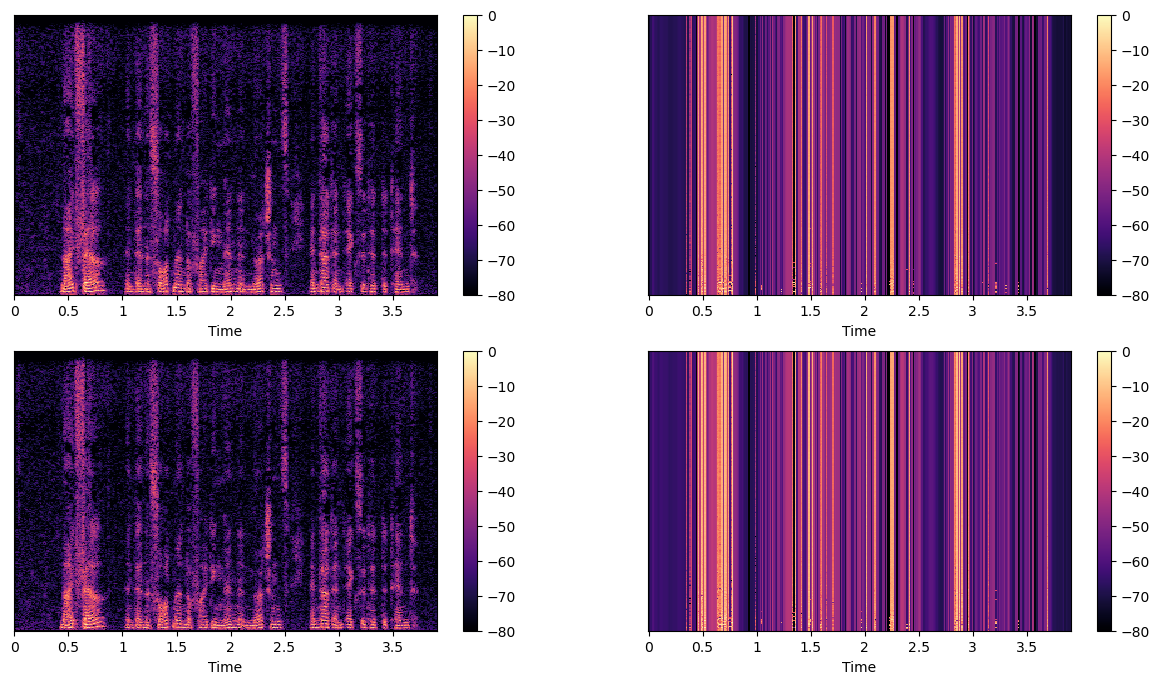

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

for ax, data in zip(axes[0], [D_voice_real, pred.real]) : 
    D_db = librosa.amplitude_to_db(data, ref=np.max)
    cb = librosa.display.specshow(D_db, x_axis="time", sr=sample_rate * 2, ax=ax)
    plt.colorbar(cb)

for ax, data in zip(axes[1], [D_voice_imag, pred.imag]) : 
    D_db = librosa.amplitude_to_db(data, ref=np.max)
    cb = librosa.display.specshow(D_db, x_axis="time", sr=sample_rate * 2, ax=ax)
    plt.colorbar(cb)

plt.show()

In [20]:
voice_inverse = librosa.istft(D_voice_complex)
pred_inverse = librosa.istft(pred)

display(Audio(voice_inverse, rate=sample_rate))
display(Audio(pred_inverse, rate=sample_rate))